<a href="https://colab.research.google.com/github/holstbone/Neural-Networks-Music-Genres/blob/main/A_4_1B_Create_MEL_Spectrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.4 Music "Vision"



# Andy's Work Starts Here:

## Part 1B: Creating 50% of MEL Spectrograms (on NU account)

https://www.tensorflow.org/datasets/overview

https://www.tensorflow.org/datasets/catalog/gtzan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydub

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import pydub

import librosa
import librosa.display

import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
ds, info = tfds.load('gtzan', split='train', shuffle_files=True, with_info=True, data_dir='/content/')
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /content/gtzan/1.0.0.incomplete5T2L0Y/gtzan-train.tfrecord


  0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset gtzan downloaded and prepared to /content/gtzan/1.0.0. Subsequent calls will reuse this data.
<_OptionsDataset shapes: {audio: (None,), audio/filename: (), label: ()}, types: {audio: tf.int64, audio/filename: tf.string, label: tf.int64}>


In [ ]:
for example in ds.take(1):  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  audio = example["audio/filename"]
  label = example["label"]
  print(audio, label)

['audio', 'audio/filename', 'label']
tf.Tensor(b'metal.00040.wav', shape=(), dtype=string) tf.Tensor(6, shape=(), dtype=int64)


In [ ]:
info

tfds.core.DatasetInfo(
    name='gtzan',
    version=1.0.0,
    description='The dataset consists of 1000 audio tracks each 30 seconds long.
It contains 10 genres, each represented by 100 tracks.
The tracks are all 22050Hz Mono 16-bit audio files in .wav format.

The genres are:

* blues
* classical
* country
* disco
* hiphop
* jazz
* metal
* pop
* reggae
* rock',
    homepage='http://marsyas.info/index.html',
    features=FeaturesDict({
        'audio': Audio(shape=(None,), dtype=tf.int64),
        'audio/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=1000,
    splits={
        'train': 1000,
    },
    supervised_keys=('audio', 'label'),
    citation="""@misc{tzanetakis_essl_cook_2001,
    author    = "Tzanetakis, George and Essl, Georg and Cook, Perry",
    title     = "Automatic Musical Genre Classification Of Audio Signals",
    url       = "http://ismir2001.ismir.net/pdf/tzanetakis.

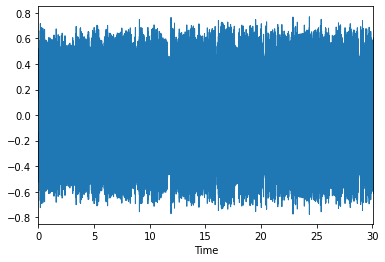

In [ ]:
filename = '/content/downloads/extracted/TAR_GZ/genres/country/country.00000.wav'
y, sr = librosa.load(filename)
# trim silent edges
country_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(country_song, sr=sr);

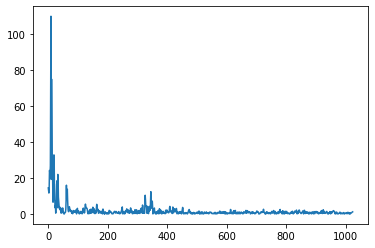

In [ ]:
n_fft = 2048
D = np.abs(librosa.stft(country_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

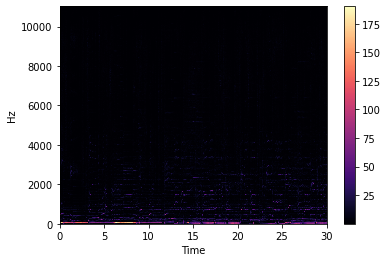

In [ ]:
hop_length = 512
D = np.abs(librosa.stft(country_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

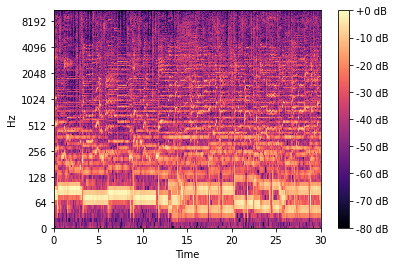

In [ ]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [ ]:
DB.shape

(1025, 1296)

In [ ]:
df_test = tfds.as_dataframe(ds.take(4), info)

In [ ]:
df_test

In [ ]:
len(df_test['audio'][0])

661794

In [ ]:
len(df_test['audio'][1])

661504

# Exemplar Code

In [ ]:
os.makedirs('/content/spectrograms3sec')

In [ ]:
genres = 'blues classical country disco pop hiphop jazz metal reggae rock'
genres = genres.split()

In [ ]:
for g in genres:
  path1 = os.path.join('/content/audio3sec',f'{g}')
  os.makedirs(path1)
  path = os.path.join('/content/spectrograms3sec',f'{g}')
  
  os. makedirs(path)

In [ ]:
from pydub import AudioSegment
newSong = 'newSong'
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('/content/downloads/extracted/TAR_GZ/genres',f"{g}")):

    song  =  os.path.join(f'/content/downloads/extracted/TAR_GZ/genres/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #print(i)
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'/content/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
pop
hiphop
jazz
metal
reggae
rock


In [ ]:
!zip -r /content/audio3sec.zip /content/audio3sec

In [ ]:
# for g in genres:
#   j = 0
#   print(g)
#   for filename in os.listdir(os.path.join('/content/audio3sec',f"{g}")):
#     song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
#     j = j+1
    
#     y,sr = librosa.load(song,duration=3)
#     #print(sr)
#     mels = librosa.feature.melspectrogram(y=y,sr=sr)
#     fig = plt.Figure()
#     canvas = FigureCanvas(fig)
#     p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
#     plt.savefig(f'/content/drive/MyDrive/spectrograms3sec/{g}/{g+str(j)}.png')

# THIS CODE FAILED 1/2 WAY THROUGH COUNTRY, SO I WENT TO MANUAL MODE

blues
classical
country


country


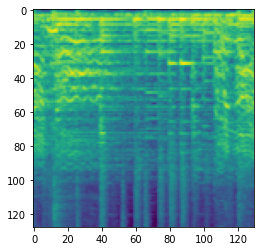

In [ ]:
g='country'
j = 0
print(g)
for filename in os.listdir(os.path.join('/content/audio3sec',f"{g}")):
  song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
  j = j+1
    
  y,sr = librosa.load(song,duration=3)
  #print(sr)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig(f'/content/drive/MyDrive/spectrograms3sec/{g}/{g+str(j)}.png')


disco


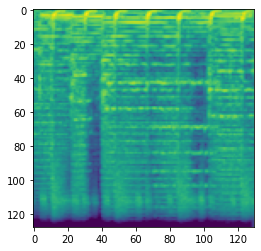

In [ ]:
g='disco'
j = 0
print(g)
for filename in os.listdir(os.path.join('/content/audio3sec',f"{g}")):
  song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
  j = j+1
    
  y,sr = librosa.load(song,duration=3)
  #print(sr)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig(f'/content/drive/MyDrive/spectrograms3sec/{g}/{g+str(j)}.png')

In [ ]:
test = os.listdir(os.path.join('/content/audio3sec/hiphop'))[900:1000]

In [ ]:
for k in range(0,10):
  test = os.listdir(os.path.join('/content/audio3sec/',f"{g}"))[k*100:(k*100)+100]
  print(len(test))

100
100
100
100
100
100
100
100
100
100


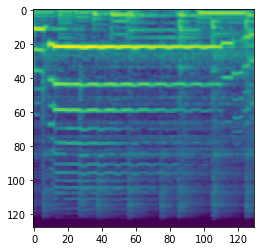

In [ ]:
g='jazz'
j = 0
for k in range(0,10):
  filenames = os.listdir(os.path.join('/content/audio3sec/',f"{g}"))[k*100:(k*100)+100]
  for filename in filenames:
    song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms3sec/{g}/{g+str(j)}.png')

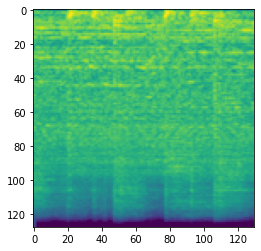

In [ ]:
g='metal'
j = 0
for k in range(0,10):
  filenames = os.listdir(os.path.join('/content/audio3sec/',f"{g}"))[k*100:(k*100)+100]
  for filename in filenames:
    song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms3sec/{g}/{g+str(j)}.png')

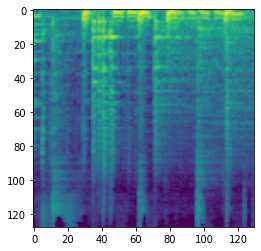

In [ ]:
g='reggae'
j = 0
for k in range(0,10):
  filenames = os.listdir(os.path.join('/content/audio3sec/',f"{g}"))[k*100:(k*100)+100]
  for filename in filenames:
    song  =  os.path.join(f'/content/audio3sec/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms3sec/{g}/{g+str(j)}.png')

In [ ]:
%%shell
jupyter nbconvert --to html /content/MSDS458_A_4_1B_Create_MEL_Spectrograms.ipynb

[NbConvertApp] Converting notebook /content/MSDS458_A_4_1B_Create_MEL_Spectrograms.ipynb to html
[NbConvertApp] Writing 8207470 bytes to /content/MSDS458_A_4_1B_Create_MEL_Spectrograms.html
